In [8]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv"
df = pd.read_csv(url)

In [9]:
# printing the first 5 rows of the dataset
print(df.head())

   CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0          39.1         18.7          181.0    3750.0        0
1          39.5         17.4          186.0    3800.0        0
2          40.3         18.0          195.0    3250.0        0
3           NaN          NaN            NaN       NaN        0
4          36.7         19.3          193.0    3450.0        0


Text(0, 0.5, 'Count')

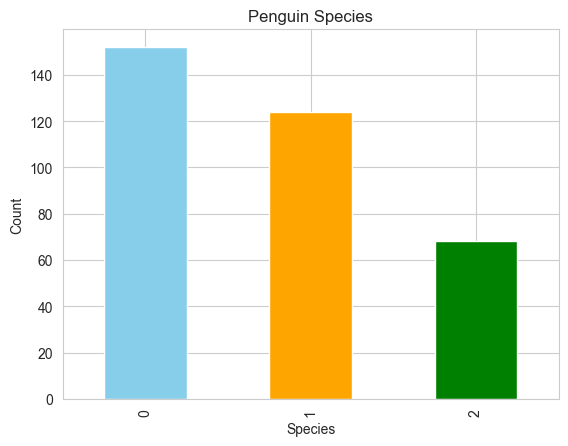

In [10]:
# Let's visualize the distribution of the penguins species with a bar plot in matplotlib
import matplotlib.pyplot as plt
df["Species"].value_counts().plot(kind="bar", color=["skyblue", "orange", "green"])
plt.title("Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")

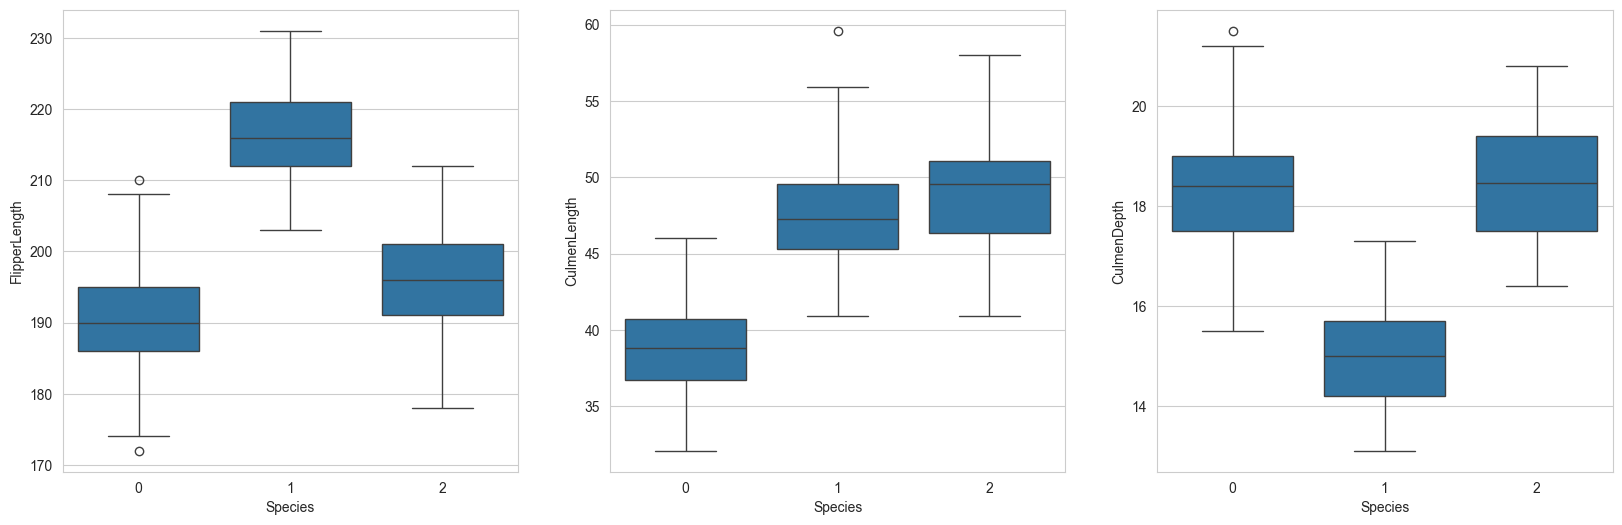

In [11]:
# Let's visualize with boxplots how the FlipperLength, CulmenLength and CulmenDepth are distributed for each species
# importing seaborn

import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x='Species', y='FlipperLength', data=df, ax=ax[0])
sns.boxplot(x='Species', y='CulmenLength', data=df, ax=ax[1])
sns.boxplot(x='Species', y='CulmenDepth', data=df, ax=ax[2])
plt.show()


In [12]:
# Show rows with missing values
print(df[df.isnull().any(axis=1)])


     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
3             NaN          NaN            NaN       NaN        0
271           NaN          NaN            NaN       NaN        1


In [13]:
# Drop rows with missing values
df = df.dropna()

In [14]:
# Let's prepare for training:
# 1. Split the data into features and labels
# 2. Split the data into training and test sets

# Split the data into features and labels
# features are CulmenLength, CulmenDepth, FlipperLength
# labels are Species
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength']
label = 'Species'
X = df[features]
y = df[label]


In [15]:
# Split the data into training and test sets in a way to have 30% of the data for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=0)


In [16]:
# Let's train a Logistic Regression model
# 1. Create a multiclass Logistic Regression model
# 2. Train the model

# Create a multiclass Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='newton-cg') # solver='lbfgs' is the default solver, but it doesn't support multinomial loss

# Train the model
model.fit(X_train, y_train)


C:\Users\ajbaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [17]:
# Let's evaluate the model
# 1. Predict the labels of the test set
# 2. Calculate the accuracy of the model

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.99


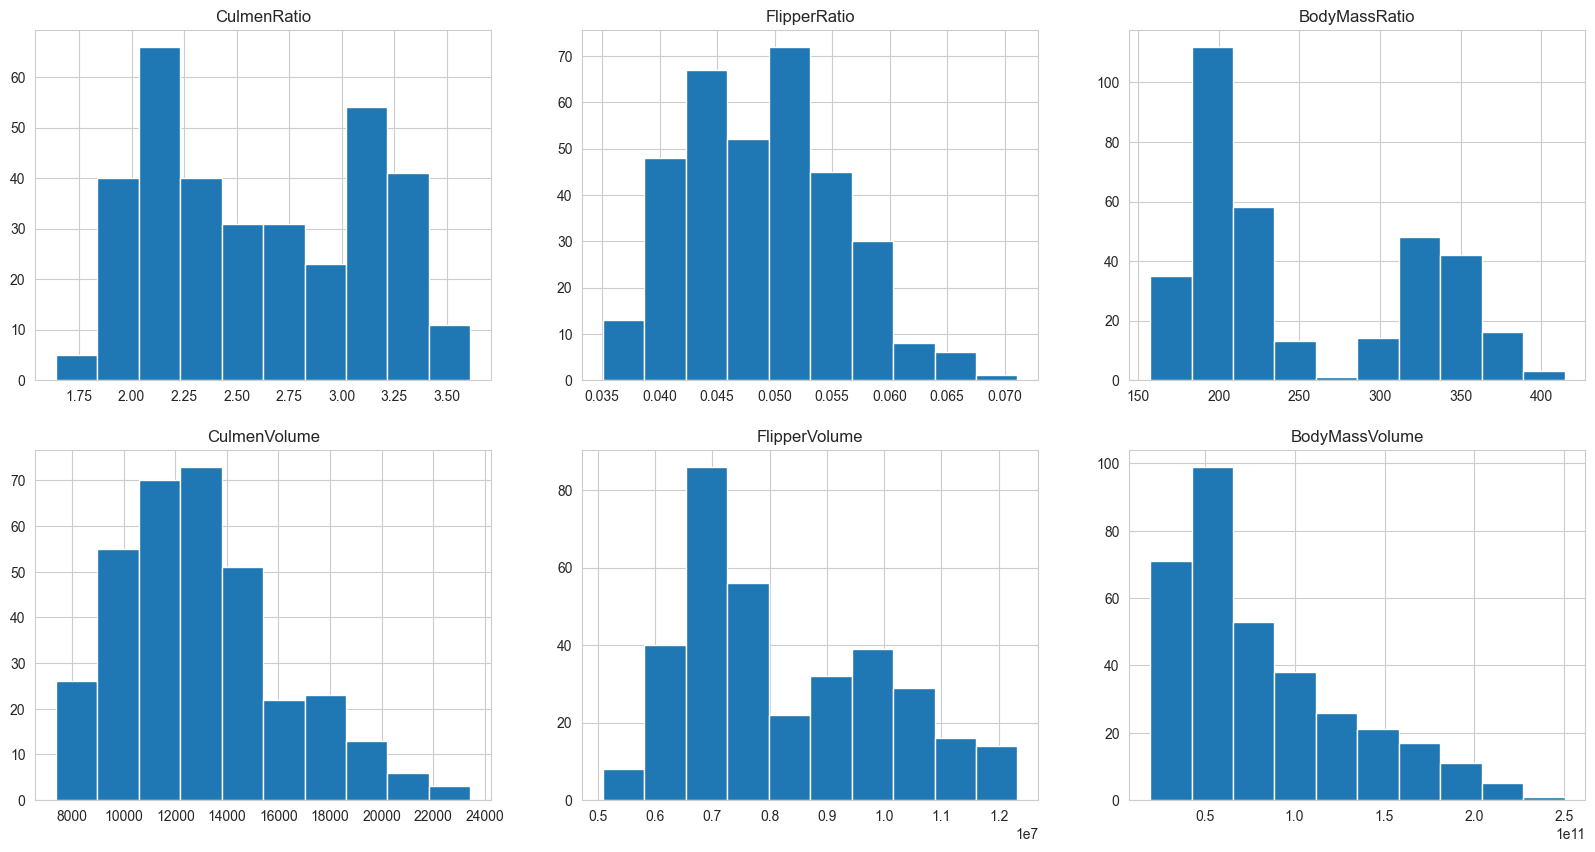

In [18]:
# feature engineering
# Create a new feature called CulmenRatio
df['CulmenRatio'] = df['CulmenLength'] / df['CulmenDepth']

# Create a new feature called FlipperRatio
df['FlipperRatio'] = df['FlipperLength'] / df['BodyMass']

# Create a new feature called BodyMassRatio
df['BodyMassRatio'] = df['BodyMass'] / df['CulmenDepth']

# Create a new feature called CulmenVolume
df['CulmenVolume'] = df['CulmenLength'] * df['CulmenDepth'] * df['CulmenDepth']

# Create a new feature called FlipperVolume
df['FlipperVolume'] = df['FlipperLength'] * df['FlipperLength'] * df['FlipperLength']

# Create a new feature called BodyMassVolume
df['BodyMassVolume'] = df['BodyMass'] * df['BodyMass'] * df['BodyMass']

# Create a new feature called BodyMassCulmenRatio
df['BodyMassCulmenRatio'] = df['BodyMass'] / df['CulmenLength']


# Let's visualize the distribution of the new features with a histogram in matplotlib
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].hist(df['CulmenRatio'])
ax[0, 0].set_title('CulmenRatio')
ax[0, 1].hist(df['FlipperRatio'])
ax[0, 1].set_title('FlipperRatio')
ax[0, 2].hist(df['BodyMassRatio'])
ax[0, 2].set_title('BodyMassRatio')
ax[1, 0].hist(df['CulmenVolume'])
ax[1, 0].set_title('CulmenVolume')
ax[1, 1].hist(df['FlipperVolume'])
ax[1, 1].set_title('FlipperVolume')
ax[1, 2].hist(df['BodyMassVolume'])
ax[1, 2].set_title('BodyMassVolume')
plt.show()
